In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_path = "data/train.csv"
test_path  = "data/test.csv"

train = pd.read_csv(train_path)
test  = pd.read_csv(test_path)

print("train shape:", train.shape)
print("test  shape:", test.shape)
print()
print("train columns:", list(train.columns))
print()
print("先頭3行（train）")
display(train.head(3))

train shape: (891, 12)
test  shape: (418, 11)

train columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

先頭3行（train）


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
num_cols = ["Survived","Pclass", "Age", "SibSp", "Parch", "Fare"]
desc = train[num_cols].describe()  
desc

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(train.isna().sum().sort_values(ascending=False))

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


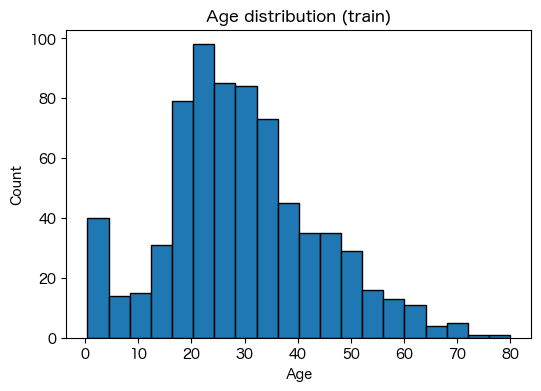

0.10    14.0
0.25    20.1
0.50    28.0
0.75    38.0
0.90    50.0
Name: Age, dtype: float64


In [6]:
ages = train["Age"].dropna()

plt.figure(figsize=(6,4))
plt.hist(ages, bins=20, edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age distribution (train)")
plt.show()

#分位点でざっくり位置を数値でも確認してみる
print(ages.quantile([0.1, 0.25, 0.5, 0.75, 0.9]).round(1))

In [7]:
#以下では、全体の中央値とクラス・性別等で中央値がずれているか確認する（欠損値補完の際の参考のため）

# 全体の中央値
overall_median = train["Age"].median()
print("Overall Age median:", round(overall_median, 1))
print()

# Pclass×Sexごとの年齢中央値と、有効データ数（欠損を除いた数）
grp = train.groupby(["Pclass", "Sex"])["Age"]
med = grp.median().round(1)
cnt = grp.apply(lambda s: s.notna().sum())

summary = pd.DataFrame({
    "Age_median": med,
    "Age_non_null": cnt
}).sort_index()

print(summary)

Overall Age median: 28.0

               Age_median  Age_non_null
Pclass Sex                             
1      female        35.0            85
       male          40.0           101
2      female        28.0            74
       male          30.0            99
3      female        21.5           102
       male          25.0           253


In [8]:
# 性別の人数分布（件数・割合）
print("== Sex counts ==")
print(train["Sex"].value_counts())
print()
print("== Sex ratio ==")
print(train["Sex"].value_counts(normalize=True).round(3))
print()

# 性別ごとの生存率（mean=生存率, count=サンプル数）
print("== Survival by Sex ==")
print(
    train.groupby("Sex")["Survived"]
         .agg(["mean", "count"])
         .rename(columns={"mean":"survival_rate"})
         .round(3)
)

# 参考：行方向で正規化したクロス集計（各性別での生存/非生存の割合）
print("\n== Crosstab (row-normalized) ==")
print(pd.crosstab(train["Sex"], train["Survived"], normalize="index").round(3))

== Sex counts ==
Sex
male      577
female    314
Name: count, dtype: int64

== Sex ratio ==
Sex
male      0.648
female    0.352
Name: proportion, dtype: float64

== Survival by Sex ==
        survival_rate  count
Sex                         
female          0.742    314
male            0.189    577

== Crosstab (row-normalized) ==
Survived      0      1
Sex                   
female    0.258  0.742
male      0.811  0.189


In [9]:
print(
    train.groupby("Pclass")["Survived"]
         .agg(["mean","count"])
         .round(3)
         .rename(columns={"mean":"survival_rate"})
)

        survival_rate  count
Pclass                      
1               0.630    216
2               0.473    184
3               0.242    491


In [10]:
# Sex × Pclass の生存率（mean）と件数（count）
rates = (
    train.groupby(["Pclass", "Sex"])["Survived"]
         .mean().round(3)
         .unstack()  
)
counts = (
    train.groupby(["Pclass", "Sex"])["Survived"]
         .count()
         .unstack()
)

print("== Survival rate by Pclass × Sex ==")
print(rates)
print()
print("== Sample count by Pclass × Sex ==")
print(counts)

== Survival rate by Pclass × Sex ==
Sex     female   male
Pclass               
1        0.968  0.369
2        0.921  0.157
3        0.500  0.135

== Sample count by Pclass × Sex ==
Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


mean: 32.2 median: 14.45 max: 512.33

quantiles (0.90, 0.95, 0.99):
0.90     77.96
0.95    112.08
0.99    249.01
Name: Fare, dtype: float64


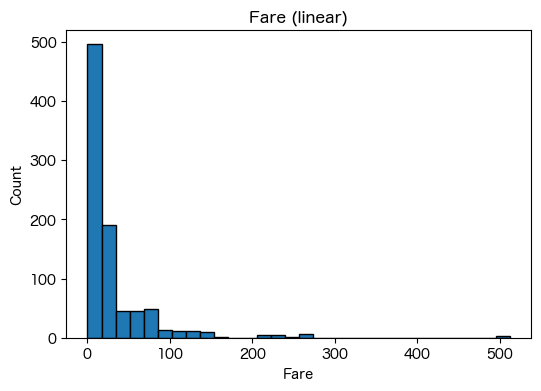

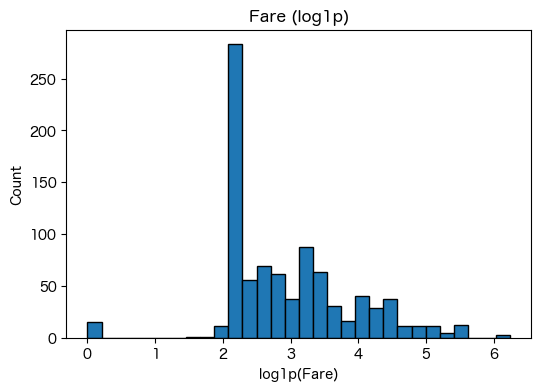


Pclass-wise Fare median
Pclass
1    60.29
2    14.25
3     8.05
Name: Fare, dtype: float64


In [11]:
fares = train["Fare"].dropna()

# ざっくり統計
print("mean:", round(fares.mean(), 2),
      "median:", round(fares.median(), 2),
      "max:", round(fares.max(), 2))
print("\nquantiles (0.90, 0.95, 0.99):")
print(fares.quantile([0.90, 0.95, 0.99]).round(2))

# ヒスト（線形軸）
plt.figure(figsize=(6,4))
plt.hist(fares, bins=30, edgecolor="black")
plt.xlabel("Fare"); plt.ylabel("Count"); plt.title("Fare (linear)")
plt.show()

#ヒストグラムを見やすくするため、単調増加である対数関数を利用すると右裾が長い分布で大きい値をギュッと圧縮し、
#低～中価格帯を見やすく広げることが目的
# ヒスト（log1p軸）※EDA用の“見え方”確認。まだ変換は確定しない
plt.figure(figsize=(6,4))
plt.hist(np.log1p(fares), bins=30, edgecolor="black")
plt.xlabel("log1p(Fare)"); plt.ylabel("Count"); plt.title("Fare (log1p)")
plt.show()

# 参考：Pclassごとの中央値
print("\nPclass-wise Fare median")
print(train.groupby("Pclass")["Fare"].median().round(2))

In [12]:
thr = train["Fare"].quantile(0.99)
tail = train[train["Fare"] >= thr]

print("99th percentile threshold:",round(thr, 2))
print("Tail size:", len(tail))
print("Tail survival rate:", round(tail["Survived"].mean(), 3))
print()
print("Pclass distribution in tail:")
print(tail["Pclass"].value_counts())

99th percentile threshold: 249.01
Tail size: 9
Tail survival rate: 0.778

Pclass distribution in tail:
Pclass
1    9
Name: count, dtype: int64


In [13]:
# 等級×生死ごとの Fare 統計（中央値・平均・件数）
by_pc = (
    train.groupby(["Pclass","Survived"])["Fare"]
         .agg(median="median", mean="mean", count="count")
         .round(2)
)
print(by_pc)

# 参考：等級ごとの差の見やすさ用に、Survived=1 と 0 の中央値差も出す
diff = (
    train.groupby(["Pclass","Survived"])["Fare"].median()
         .unstack()  # 列: Survived(0/1)
)
diff["median_gap"] = (diff[1] - diff[0]).round(2)
print("\nMedian gap (Survived=1 - 0) by Pclass")
print(diff[["median_gap"]])

                 median   mean  count
Pclass Survived                      
1      0          44.75  64.68     80
       1          77.96  95.61    136
2      0          13.00  19.41     97
       1          21.00  22.06     87
3      0           8.05  13.67    372
       1           8.52  13.69    119

Median gap (Survived=1 - 0) by Pclass
Survived  median_gap
Pclass              
1              33.21
2               8.00
3               0.47


In [14]:
# Embarked の分布と生存率（NaNも一緒に数える）
print("== Embarked counts (incl. NaN) ==")
print(train["Embarked"].value_counts(dropna=False))
print()

print("== Survival by Embarked ==")
print(
    train.groupby("Embarked")["Survived"]
         .agg(["mean","count"])
         .round(3)
         .rename(columns={"mean":"survival_rate"})
)
print()

print("== Pclass mix within Embarked (row-normalized) ==")
print(pd.crosstab(train["Embarked"], train["Pclass"], normalize="index").round(3))

== Embarked counts (incl. NaN) ==
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

== Survival by Embarked ==
          survival_rate  count
Embarked                      
C                 0.554    168
Q                 0.390     77
S                 0.337    644

== Pclass mix within Embarked (row-normalized) ==
Pclass        1      2      3
Embarked                     
C         0.506  0.101  0.393
Q         0.026  0.039  0.935
S         0.197  0.255  0.548


In [15]:
na_emb = train[train["Embarked"].isna()][
    ["PassengerId","Name","Pclass","Sex","Fare","Ticket","Cabin","Survived"]
]
na_emb

,PassengerId,Name,Pclass,Sex,Fare,Ticket,Cabin,Survived
61,62,"Icard, Miss. Amelie",1,female,80.0,113572,B28,1
829,830,"Stone, Mrs. George Nelson (Martha Evelyn)",1,female,80.0,113572,B28,1


In [16]:
# 1等だけに絞る
p1 = train[train["Pclass"] == 1].copy()

print("== Embarked counts in Pclass=1 (incl. NaN) ==")
print(p1["Embarked"].value_counts(dropna=False))
print()

# 港ごとの運賃分布（四分位点）
print("== Fare quantiles by Embarked (Pclass=1) ==")
q = p1.groupby("Embarked")["Fare"].quantile([0.25, 0.5, 0.75]).unstack()
print(q.round(2))

# 「80に一番近い中央値」を確認（港ごと）
med = p1.groupby("Embarked")["Fare"].median()
print("\n== |median - 80| by Embarked (Pclass=1) ==")
print((med - 80).abs().sort_values().round(2))

# 参考：Pclass=1 かつ Fare≈80 の既知データがどの港か
near = p1[(p1["Fare"].between(79, 81)) & (p1["Embarked"].notna())]
print("\n== Near-80 Fare rows (Pclass=1, known Embarked) ==")
print(near["Embarked"].value_counts())

== Embarked counts in Pclass=1 (incl. NaN) ==
Embarked
S      127
C       85
NaN      2
Q        2
Name: count, dtype: int64

== Fare quantiles by Embarked (Pclass=1) ==
           0.25   0.50    0.75
Embarked                      
C         49.50  78.27  110.88
Q         90.00  90.00   90.00
S         29.25  52.00   83.48

== |median - 80| by Embarked (Pclass=1) ==
Embarked
C     1.73
Q    10.00
S    28.00
Name: Fare, dtype: float64

== Near-80 Fare rows (Pclass=1, known Embarked) ==
Embarked
C    4
S    3
Name: count, dtype: int64


In [17]:
# Pclass×Sex ごとの Age の中央値と有効件数（欠損除く）
grp = train.groupby(["Pclass","Sex"])["Age"]
med = grp.median().round(1).unstack()   # 中央値
cnt = grp.count().unstack()             # 欠損を除いた件数

print("== Age median by Pclass × Sex ==")
print(med)
print("\n== Age non-null count by Pclass × Sex ==")
print(cnt)

== Age median by Pclass × Sex ==
Sex     female  male
Pclass              
1         35.0  40.0
2         28.0  30.0
3         21.5  25.0

== Age non-null count by Pclass × Sex ==
Sex     female  male
Pclass              
1           85   101
2           74    99
3          102   253


In [18]:
#テストの欠損も確認する。あくまで見て確認するだけで、学習ではないからOK
print("== test 欠損数 ==")
print(test.isna().sum().sort_values(ascending=False))

== test 欠損数 ==
Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64


In [19]:
na_fare = test[test["Fare"].isna()][["PassengerId","Pclass","Sex","Embarked","Ticket","Cabin"]]
na_fare

,PassengerId,Pclass,Sex,Embarked,Ticket,Cabin
152,1044,3,male,S,3701,NaN


In [21]:
#以下、前処理を行っていく。
#Embarked欠損（train）： 'C' で補完。
#Age欠損： Pclass×Sexの中央値で補完（各グループ件数も十分）
#Fareの扱い： log1p(Fare) を作成＋ HighFareフラグ（trainの99%分位≈249以上）
#testのFare欠損1件： (Pclass, Embarked)ごとのtrain中央値で埋める
#いずれも 基準はtrainだけで算出→testには“適用のみ”（リーク防止）

In [28]:
# 前処理に必要な「train由来の統計」を作って保存するだけ（変換・補完はまだしない）
def fit_preproc_stats(train_df):
    stats = {}

    # Age: Pclass×Sex の中央値（補完に使う）
    stats["age_median_tbl"] = train_df.groupby(["Pclass","Sex"])["Age"].median()

    # Fare: Pclass×Embarked の中央値（testのFare欠損=1件の補完に使う）
    stats["fare_median_tbl"] = train_df.groupby(["Pclass","Embarked"])["Fare"].median()

    # Fare: 99%しきい（HighFareフラグ用）
    stats["fare_q99"] = float(train_df["Fare"].quantile(0.99))

    # Embarked: trainの欠損は “C” で補完（方針として固定）
    stats["embarked_fill_value"] = "C"

    return stats

preproc_stats = fit_preproc_stats(train)
print("Keys:", preproc_stats.keys())
print()

print("fare_q99:", round(preproc_stats["fare_q99"], 2))

print("\nAge median table (head):")
print(preproc_stats["age_median_tbl"].head())

print("\nFare median table (head):")
print(preproc_stats["fare_median_tbl"].head())

Keys: dict_keys(['age_median_tbl', 'fare_median_tbl', 'fare_q99', 'embarked_fill_value'])

fare_q99: 249.01

Age median table (head):
Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
Name: Age, dtype: float64

Fare median table (head):
Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
Name: Fare, dtype: float64


In [22]:
# 作業用コピー
train1 = train.copy()
test1  = test.copy()

# ルール：Embarked 欠損は "C" で補完（trainからの検討結果）
train1["Embarked"] = train1["Embarked"].fillna("C")
test1["Embarked"]  = test1["Embarked"].fillna("C")  # 念のため（通常は欠損0のはず）

print("Embarked NaNs (train):", train["Embarked"].isna().sum(), "->", train1["Embarked"].isna().sum())
print("Embarked NaNs (test):",  test["Embarked"].isna().sum(),  "->", test1["Embarked"].isna().sum())

Embarked NaNs (train): 2 -> 0
Embarked NaNs (test): 0 -> 0


In [23]:
# 1) 基準（trainだけで学習）
age_median_tbl = train.groupby(["Pclass","Sex"])["Age"].median()

# 2) 適用用の小関数（元dfは触らない）
def apply_age_group_median(df, age_tbl):
    out = df.copy()
    out = out.merge(age_tbl.rename("Age_median"), on=["Pclass","Sex"], how="left")
    mask = out["Age"].isna()
    out.loc[mask, "Age"] = out.loc[mask, "Age_median"]
    out = out.drop(columns=["Age_median"])
    return out

# 3) train/testの作業用コピーに適用（train1/test1 は Embarked 補完済み）
train2 = apply_age_group_median(train1, age_median_tbl)
test2  = apply_age_group_median(test1,  age_median_tbl)

print("Age NaNs (train):", train1["Age"].isna().sum(), "->", train2["Age"].isna().sum())
print("Age NaNs (test):",  test1["Age"].isna().sum(),  "->", test2["Age"].isna().sum())

Age NaNs (train): 177 -> 0
Age NaNs (test): 86 -> 0


In [29]:
# 0) 学習（train2 からだけ計算）
fare_tbl = (
    train2.groupby(["Pclass","Embarked"])["Fare"]
          .median()
          .rename("Fare_med")
          .reset_index()
)
fare_q99 = float(train2["Fare"].quantile(0.99))  # HighFare しきい

# 1) 欠損埋め（同じ基準を train/test に適用）
def fill_fare(df):
    out = df.merge(fare_tbl, on=["Pclass","Embarked"], how="left")
    out["Fare"] = out["Fare"].fillna(out["Fare_med"])
    return out.drop(columns="Fare_med")

train3 = fill_fare(train2)
test3  = fill_fare(test2)

print("Fare NaNs (train):", train2["Fare"].isna().sum(), "->", train3["Fare"].isna().sum())
print("Fare NaNs (test):",  test2["Fare"].isna().sum(),  "->", test3["Fare"].isna().sum())

Fare NaNs (train): 0 -> 0
Fare NaNs (test): 1 -> 0


In [31]:
#以下で強い特徴量を追加しておく。そうすると、モデル比較のときに便利

In [30]:
# 2) 変換とフラグ（両方に同じ処理）
import numpy as np
for df in (train3, test3):
    df["Fare_log1p"] = np.log1p(df["Fare"])
    df["HighFare"]   = (df["Fare"] >= fare_q99).astype(int)

print("fare_q99:", round(fare_q99, 2))

fare_q99: 249.01


In [32]:
import numpy as np
import pandas as pd

# === 1) 家族系 ===
for df in (train3, test3):
    df["FamilySize"] = (df["SibSp"] + df["Parch"] + 1).astype(int)
    df["IsAlone"]    = (df["FamilySize"] == 1).astype(int)

# === 2) Woman/Child/Mother（Title無し版） ===
for df in (train3, test3):
    df["WomanChild"] = ((df["Sex"] == "female") | (df["Age"] < 16)).astype(int)
    # Titleを使わない近似（Missを厳密に除外できない点は承知の上で）
    df["MotherLite"] = (
        (df["Sex"] == "female") & (df["Age"] >= 18) & (df["Parch"] > 0)
    ).astype(int)

# === 3) Ticketグループ & 一人あたり運賃 ===
def add_ticket_group_features(df):
    out = df.copy()
    grp_size = out.groupby("Ticket")["Ticket"].transform("count").astype(int)
    out["TicketGroupSize"] = grp_size
    out["TicketIsShared"]  = (grp_size > 1).astype(int)
    out["FarePerPerson"] = out["Fare"] / grp_size.clip(lower=1)
    out["FarePerPerson_log1p"] = np.log1p(out["FarePerPerson"])
    return out

train3 = add_ticket_group_features(train3)
test3  = add_ticket_group_features(test3)

# === 4) 相互作用（カテゴリ結合）===
for df in (train3, test3):
    df["Pclass_Sex"] = df["Pclass"].astype(str) + "_" + df["Sex"]

# クイック確認
cols = ["FamilySize","IsAlone","WomanChild","MotherLite",
        "TicketGroupSize","TicketIsShared","FarePerPerson","FarePerPerson_log1p","Pclass_Sex"]
print("Added cols present? ->", all(c in train3.columns for c in cols))
print(train3[cols].head())

Added cols present? -> True
   FamilySize  IsAlone  WomanChild  MotherLite  TicketGroupSize  \
0           2        0           0           0                1   
1           2        0           1           0                1   
2           1        1           1           0                1   
3           2        0           1           0                2   
4           1        1           0           0                1   

   TicketIsShared  FarePerPerson  FarePerPerson_log1p Pclass_Sex  
0               0         7.2500             2.110213     3_male  
1               0        71.2833             4.280593   1_female  
2               0         7.9250             2.188856   3_female  
3               1        26.5500             3.316003   1_female  
4               0         8.0500             2.202765     3_male  


In [38]:
#以下、モデル比較を行う

In [33]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

# 使う特徴（Tier1・Titleなし）
base_feats = [
    "Pclass","Sex","Embarked","Age","SibSp","Parch","Fare_log1p",
    "FamilySize","IsAlone","WomanChild","MotherLite",
    "TicketGroupSize","TicketIsShared","FarePerPerson_log1p","Pclass_Sex"
]

# データ準備
use_cols = [c for c in base_feats if c in train3.columns]
X = train3[use_cols].copy()
y = train3["Survived"].astype(int)

# 数値/カテゴリの仕分け
num_cols = [c for c in use_cols if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in use_cols if c not in num_cols]

# 前処理 + モデル
pre = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
])
pipe_log = Pipeline([("prep", pre), ("clf", LogisticRegression(max_iter=2000))])

# 5分割CVで評価
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = cross_val_score(pipe_log, X, y, cv=cv, scoring="accuracy")
auc = cross_val_score(pipe_log, X, y, cv=cv, scoring="roc_auc")

print("LogReg 5-fold ACC:", round(acc.mean(),4), "+/-", round(acc.std(),4))
print("LogReg 5-fold AUC:", round(auc.mean(),4), "+/-", round(auc.std(),4))

LogReg 5-fold ACC: 0.8305 +/- 0.0146
LogReg 5-fold AUC: 0.8657 +/- 0.0169


In [34]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC

# 使う特徴（Tier1・Titleなし）
base_feats = [
    "Pclass","Sex","Embarked","Age","SibSp","Parch","Fare_log1p",
    "FamilySize","IsAlone","WomanChild","MotherLite",
    "TicketGroupSize","TicketIsShared","FarePerPerson_log1p","Pclass_Sex"
]

# データ準備
use_cols = [c for c in base_feats if c in train3.columns]
X = train3[use_cols].copy()
y = train3["Survived"].astype(int)

# 数値/カテゴリの仕分け
num_cols = [c for c in use_cols if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in use_cols if c not in num_cols]

# 前処理 + モデル（SVCは標準化が効く）
pre = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
])
pipe_svc = Pipeline([
    ("prep", pre),
    ("clf", SVC(kernel="rbf", probability=True))  # probability=True は AUC 用
])

# 5分割CVで評価
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = cross_val_score(pipe_svc, X, y, cv=cv, scoring="accuracy")
auc = cross_val_score(pipe_svc, X, y, cv=cv, scoring="roc_auc")

print("SVC 5-fold ACC:", round(acc.mean(),4), "+/-", round(acc.std(),4))
print("SVC 5-fold AUC:", round(auc.mean(),4), "+/-", round(auc.std(),4))

SVC 5-fold ACC: 0.8238 +/- 0.0137
SVC 5-fold AUC: 0.8658 +/- 0.0254


In [35]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# 使う特徴（Tier1・Titleなし）+ HighFare（あれば）
base_feats = [
    "Pclass","Sex","Embarked","Age","SibSp","Parch","Fare_log1p",
    "FamilySize","IsAlone","WomanChild","MotherLite",
    "TicketGroupSize","TicketIsShared","FarePerPerson_log1p","Pclass_Sex"
]
rf_feats = base_feats + (["HighFare"] if "HighFare" in train3.columns else [])

# データ準備
use_cols = [c for c in rf_feats if c in train3.columns]
X = train3[use_cols].copy()
y = train3["Survived"].astype(int)

# 数値/カテゴリの仕分け
num_cols = [c for c in use_cols if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in use_cols if c not in num_cols]

# 前処理：数値はそのまま、カテゴリはOne-Hot
pre = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
])

pipe_rf = Pipeline([
    ("prep", pre),
    ("clf", RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        n_jobs=-1
    ))
])

# 5分割CVで評価
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = cross_val_score(pipe_rf, X, y, cv=cv, scoring="accuracy")
auc = cross_val_score(pipe_rf, X, y, cv=cv, scoring="roc_auc")

print("RF 5-fold ACC:", round(acc.mean(),4), "+/-", round(acc.std(),4))
print("RF 5-fold AUC:", round(auc.mean(),4), "+/-", round(auc.std(),4))

RF 5-fold ACC: 0.8058 +/- 0.0133
RF 5-fold AUC: 0.8741 +/- 0.0222


In [39]:
#以下、ハイパーパラメータ最適化、チューニングを行う

In [36]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression

# 使う特徴（Tier1・Titleなし）
base_feats = [
    "Pclass","Sex","Embarked","Age","SibSp","Parch","Fare_log1p",
    "FamilySize","IsAlone","WomanChild","MotherLite",
    "TicketGroupSize","TicketIsShared","FarePerPerson_log1p","Pclass_Sex"
]

# データ準備
use_cols = [c for c in base_feats if c in train3.columns]
X = train3[use_cols].copy()
y = train3["Survived"].astype(int)

# 数値/カテゴリの仕分け
num_cols = [c for c in use_cols if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in use_cols if c not in num_cols]

# 前処理 + モデル
pre = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
])
pipe_log = Pipeline([("prep", pre), ("clf", LogisticRegression(max_iter=2000))])

# 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# グリッド（Cだけまず最適化）
param_log = {
    "clf__C": [0.1, 0.3, 1, 3, 10],
    "clf__penalty": ["l2"],
    "clf__solver": ["lbfgs"],
}

grid_log = GridSearchCV(pipe_log, param_log, cv=cv, scoring="accuracy", n_jobs=-1, return_train_score=False)
grid_log.fit(X, y)

print("Best ACC:", round(grid_log.best_score_, 4))
print("Best params:", grid_log.best_params_)

# ざっくり結果表（上位）
res = (pd.DataFrame(grid_log.cv_results_)
         .sort_values("mean_test_score", ascending=False)
         [["mean_test_score","param_clf__C"]]
         .head(10))
print(res)

Best ACC: 0.8305
Best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
   mean_test_score  param_clf__C
0         0.830519           0.1
2         0.830507           1.0
1         0.829396           0.3
4         0.828278          10.0
3         0.826031           3.0


In [37]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC

# 使う特徴（Tier1・Titleなし）
base_feats = [
    "Pclass","Sex","Embarked","Age","SibSp","Parch","Fare_log1p",
    "FamilySize","IsAlone","WomanChild","MotherLite",
    "TicketGroupSize","TicketIsShared","FarePerPerson_log1p","Pclass_Sex"
]

use_cols = [c for c in base_feats if c in train3.columns]
X = train3[use_cols].copy()
y = train3["Survived"].astype(int)

num_cols = [c for c in use_cols if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in use_cols if c not in num_cols]

pre = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
])

pipe_svc = Pipeline([
    ("prep", pre),
    ("clf", SVC(kernel="rbf", probability=True))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_svc = {
    "clf__C": [0.3, 1, 3, 10],
    "clf__gamma": ["scale", 0.03, 0.1, 0.3, 1.0],
    "clf__kernel": ["rbf"],
    "clf__probability": [True],
}

grid_svc = GridSearchCV(pipe_svc, param_svc, cv=cv, scoring="accuracy", n_jobs=-1, return_train_score=False)
grid_svc.fit(X, y)

print("Best ACC:", round(grid_svc.best_score_, 4))
print("Best params:", grid_svc.best_params_)

res = (pd.DataFrame(grid_svc.cv_results_)
         .sort_values("mean_test_score", ascending=False)
         [["mean_test_score","param_clf__C","param_clf__gamma"]]
         .head(10))
print(res)

Best ACC: 0.8294
Best params: {'clf__C': 0.3, 'clf__gamma': 0.03, 'clf__kernel': 'rbf', 'clf__probability': True}
    mean_test_score  param_clf__C param_clf__gamma
1          0.829402           0.3             0.03
0          0.829396           0.3            scale
6          0.828272           1.0             0.03
11         0.828266           3.0             0.03
2          0.827155           0.3              0.1
10         0.823784           3.0            scale
5          0.823784           1.0            scale
16         0.822648          10.0             0.03
7          0.821543           1.0              0.1
13         0.820426           3.0              0.3


In [40]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 使う特徴（Tier1・Titleなし）+ HighFare（あれば）
base_feats = [
    "Pclass","Sex","Embarked","Age","SibSp","Parch","Fare_log1p",
    "FamilySize","IsAlone","WomanChild","MotherLite",
    "TicketGroupSize","TicketIsShared","FarePerPerson_log1p","Pclass_Sex"
]
rf_feats = base_feats + (["HighFare"] if "HighFare" in train3.columns else [])

use_cols = [c for c in rf_feats if c in train3.columns]
X = train3[use_cols].copy()
y = train3["Survived"].astype(int)

num_cols = [c for c in use_cols if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in use_cols if c not in num_cols]

pre = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
])

pipe_rf = Pipeline([
    ("prep", pre),
    ("clf", RandomForestClassifier(random_state=42, n_jobs=-1))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 軽めのグリッド（精度寄り：深さ・葉のサイズ・特徴数）
param_rf = {
    "clf__n_estimators": [300, 500, 800],
    "clf__max_depth": [None, 8, 12, 16],
    "clf__min_samples_leaf": [1, 2, 4],
    "clf__max_features": ["sqrt", 0.5],
}

grid_rf = GridSearchCV(pipe_rf, param_rf, cv=cv, scoring="accuracy", n_jobs=-1, return_train_score=False)
grid_rf.fit(X, y)

print("Best ACC:", round(grid_rf.best_score_, 4))
print("Best params:", grid_rf.best_params_)

res = (pd.DataFrame(grid_rf.cv_results_)
         .sort_values("mean_test_score", ascending=False)
         [["mean_test_score","param_clf__n_estimators",
           "param_clf__max_depth","param_clf__min_samples_leaf","param_clf__max_features"]]
         .head(10))
print(res)

Best ACC: 0.8462
Best params: {'clf__max_depth': 8, 'clf__max_features': 0.5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 800}
    mean_test_score  param_clf__n_estimators param_clf__max_depth  \
29         0.846218                      800                    8   
28         0.846218                      500                    8   
27         0.843965                      300                    8   
34         0.842854                      500                    8   
33         0.842854                      300                    8   
30         0.842854                      300                    8   
70         0.842841                      500                   16   
52         0.842841                      500                   12   
16         0.842841                      500                 None   
15         0.841717                      300                 None   

    param_clf__min_samples_leaf param_clf__max_features  
29                            1                   

In [41]:
#最終RFで学習 → 提出ファイル作成（submission.csv）

In [42]:
import pandas as pd

# 1) ベスト推定器を取り出し、train全体で学習
best_rf = grid_rf.best_estimator_
best_rf.fit(X, y)   # ← X,y は直前のRFグリッドで使ったもの

# 2) testデータに同じ前処理→予測
X_test = test3[X.columns]   # 列順をXに合わせて安全に
preds = best_rf.predict(X_test).astype(int)

# 3) 提出用DataFrame
sub = pd.DataFrame({
    "PassengerId": test3["PassengerId"].values,
    "Survived": preds
})
# ファイルに保存したいときは ↓ を有効化
# sub.to_csv("submission.csv", index=False)

sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [43]:
#軽い振り返り（重要特徴を確認）

In [44]:
import numpy as np
import pandas as pd

best_rf = grid_rf.best_estimator_

# 前処理パイプラインから列名を復元
prep = best_rf.named_steps["prep"]
num_cols_list = prep.transformers_[0][2]  # ("num", "passthrough", num_cols)
cat_cols_list = prep.transformers_[1][2]  # ("cat", OneHotEncoder, cat_cols)
ohe = prep.named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(cat_cols_list) if len(cat_cols_list)>0 else np.array([])

feature_names = np.r_[num_cols_list, cat_feature_names]
importances = best_rf.named_steps["clf"].feature_importances_

fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(fi.head(10).round(4))

WomanChild             0.1928
Age                    0.1175
FarePerPerson_log1p    0.1171
Sex_male               0.1001
Fare_log1p             0.0972
Sex_female             0.0961
Pclass                 0.0585
FamilySize             0.0412
TicketGroupSize        0.0395
Pclass_Sex_3_female    0.0249
dtype: float64


In [45]:
sub.to_csv("submission.csv", index=False)
print("Saved:", "submission.csv")

Saved: submission.csv
